In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [5]:
DATADIR = 'C:/Users/yadav/Desktop/Data science/Projects/Celeb face/train/'

In [6]:
'''
1. Ben Affleck
2. Elton John
3. Jerry Seinfield
4. Madonna
5. Mindy Kaling
'''

'\n1. Ben Affleck\n2. Elton John\n3. Jerry Seinfield\n4. Madonna\n5. Mindy Kaling\n'

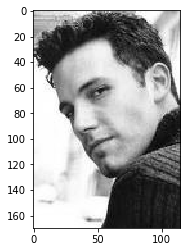

In [7]:
for actor in os.listdir(DATADIR):
    path = os.path.join(DATADIR, actor)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img),0)
        plt.imshow(img_arr, cmap='gray')
        break
    break

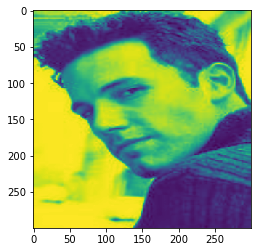

In [8]:
new_arr = cv2.resize(img_arr, (300, 300))
plt.imshow(new_arr)

In [9]:
X = []
y = []


In [10]:
def get_train_data():
    i = 0
    for actor in os.listdir(DATADIR):
        path = os.path.join(DATADIR, actor)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img),0)
                new_arr = cv2.resize(img_arr, (300, 300))
                X.append([new_arr, i])
            except Exception as e:
                pass
        i += 1
get_train_data()

In [11]:
import random
random.shuffle(X)

In [12]:
X_train = []
y_train = []

for features, label in X:
    X_train.append(features)
    y_train.append(label)

In [13]:
X_train = np.array(X_train)
X_train = X_train/255
X_train

array([[[0.42745098, 0.47843137, 0.56862745, ..., 0.87843137,
         0.8745098 , 0.8745098 ],
        [0.47843137, 0.55686275, 0.65882353, ..., 0.88235294,
         0.87843137, 0.87843137],
        [0.57254902, 0.6627451 , 0.76078431, ..., 0.88627451,
         0.88627451, 0.89019608],
        ...,
        [0.08235294, 0.08235294, 0.08235294, ..., 0.94509804,
         0.94509804, 0.94509804],
        [0.07843137, 0.07843137, 0.07843137, ..., 0.94117647,
         0.94117647, 0.94117647],
        [0.0745098 , 0.07843137, 0.07843137, ..., 0.9372549 ,
         0.9372549 , 0.9372549 ]],

       [[0.        , 0.        , 0.        , ..., 0.09411765,
         0.09411765, 0.09411765],
        [0.        , 0.        , 0.        , ..., 0.09411765,
         0.09411765, 0.09411765],
        [0.        , 0.        , 0.        , ..., 0.09411765,
         0.09019608, 0.08627451],
        ...,
        [0.10196078, 0.10196078, 0.10196078, ..., 0.04313725,
         0.04313725, 0.03921569],
        [0.1

In [14]:
X_train = X_train.reshape(-1, 300, 300, 1)

In [15]:
X_train.shape

(93, 300, 300, 1)

In [16]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape
y_train = np.array(y_train)
y_train.shape

Using Theano backend.


(93, 5)

In [18]:
test_data = []
DATADIR = 'C:/Users/yadav/Desktop/Data science/Projects/Celeb face/val/'
def create_test_data():
    i = 0
    for actor in os.listdir(DATADIR):
        path = os.path.join(DATADIR, actor)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img),0)
                new_arr = cv2.resize(img_arr, (300, 300))
                test_data.append([new_arr, i])
            except Exception as e:
                pass
        i += 1
create_test_data()

In [19]:
random.shuffle(test_data)

In [20]:
X_test = []
y_test = []
for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

In [21]:
y_test = np.array(y_test)
y_test = to_categorical(y_test)
y_test.shape

(25, 5)

In [22]:
X_test = np.array(X_test).reshape(-1, 300, 300, 1)
X_test = X_test/255
X_test

array([[[[0.22745098],
         [0.21960784],
         [0.21568627],
         ...,
         [0.16078431],
         [0.16470588],
         [0.16470588]],

        [[0.22352941],
         [0.22352941],
         [0.21960784],
         ...,
         [0.16078431],
         [0.16470588],
         [0.16470588]],

        [[0.21568627],
         [0.21960784],
         [0.22352941],
         ...,
         [0.15686275],
         [0.16078431],
         [0.16470588]],

        ...,

        [[0.16470588],
         [0.15686275],
         [0.15294118],
         ...,
         [0.14901961],
         [0.15294118],
         [0.15686275]],

        [[0.17254902],
         [0.16470588],
         [0.16078431],
         ...,
         [0.14117647],
         [0.14509804],
         [0.15294118]],

        [[0.18039216],
         [0.16862745],
         [0.16078431],
         ...,
         [0.14509804],
         [0.14901961],
         [0.15294118]]],


       [[[0.16470588],
         [0.16862745],
         [0.17

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

In [24]:
model = Sequential()

model.add(Conv2D(128, (3,3), input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10


In [21]:
model.evaluate(X_test, y_test)

25/25 [==============================] - 5s 181ms/step


[1.7542155981063843, 0.5600000023841858]

In [22]:
predictions = model.predict(X_test)

In [47]:
res = np.argmax(predictions[0])
res

1

In [48]:
img = X_test[0][:,:,0]

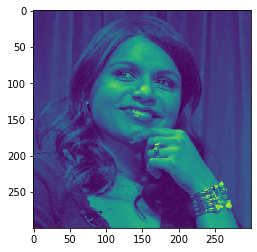

In [49]:
plt.imshow(img)

In [46]:
X_test.shape

(25, 300, 300, 1)

In [ ]:
model.save('celeb_face(5 celebs)')